In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
import datetime as dt
from numpy import log as ln

from statsmodels.compat import lzip
import statsmodels.api as sm
from statsmodels.formula.api import ols
import random

import time
import pymysql
import pandas as pd


import warnings
warnings.filterwarnings("ignore")

In [105]:
start_time = time.time()

import gzip
with gzip.open('Orders_Data_Extract.csv.gz') as f:

    df = pd.read_csv(f)

print("--- %s seconds ---" % (time.time() - start_time))
df.head()

--- 95.73097848892212 seconds ---


,idProduct,idOrder,idOrderItem,AuthDate,AISP,QTY,COS,Sales_Inc_Vat,idTsin,SellerType,Division,ReportingDepartment,Level1,Title_Tsin,BrandName
0,68406943,92400387,140721394,2021-08-20,73.91,1,0.0,85.0,52348574.0,Marketplace,Home,"Garden, Pool & Patio",Equipment,Waterhouse PVC 6mm Clear Tubing Pipe - 5m Roll,Waterhouse Pumps
1,68406943,85626730,125098683,2021-03-24,65.22,1,0.0,75.0,52348574.0,Marketplace,Home,"Garden, Pool & Patio",Equipment,Waterhouse PVC 6mm Clear Tubing Pipe - 5m Roll,Waterhouse Pumps
2,68406943,91512978,138726992,2021-08-02,65.22,1,0.0,75.0,52348574.0,Marketplace,Home,"Garden, Pool & Patio",Equipment,Waterhouse PVC 6mm Clear Tubing Pipe - 5m Roll,Waterhouse Pumps
3,68406943,90434540,136153558,2021-07-11,65.22,1,0.0,75.0,52348574.0,Marketplace,Home,"Garden, Pool & Patio",Equipment,Waterhouse PVC 6mm Clear Tubing Pipe - 5m Roll,Waterhouse Pumps
4,68406943,92616623,141252499,2021-08-25,73.91,1,0.0,85.0,52348574.0,Marketplace,Home,"Garden, Pool & Patio",Equipment,Waterhouse PVC 6mm Clear Tubing Pipe - 5m Roll,Waterhouse Pumps


In [185]:
#df = pd.merge(df, homeware_tsins, how="left", on="idTsin")

In [20]:
df.head()

,idProduct,idOrder,idOrderItem,idTsin,SellerType,Division,ReportingDepartment,Level1,BrandName,UnitPrice,Qty,Total,CostPrice,Title,Date
0,68406943,92400387,140721394,52348574.0,Marketplace,Home,"Garden, Pool & Patio",Equipment,Waterhouse Pumps,73.91,1,85.0,0.0,Waterhouse PVC 6mm Clear Tubing Pipe - 5m Roll,2021-08-20
1,68406943,85626730,125098683,52348574.0,Marketplace,Home,"Garden, Pool & Patio",Equipment,Waterhouse Pumps,65.22,1,75.0,0.0,Waterhouse PVC 6mm Clear Tubing Pipe - 5m Roll,2021-03-24
2,68406943,91512978,138726992,52348574.0,Marketplace,Home,"Garden, Pool & Patio",Equipment,Waterhouse Pumps,65.22,1,75.0,0.0,Waterhouse PVC 6mm Clear Tubing Pipe - 5m Roll,2021-08-02
3,68406943,90434540,136153558,52348574.0,Marketplace,Home,"Garden, Pool & Patio",Equipment,Waterhouse Pumps,65.22,1,75.0,0.0,Waterhouse PVC 6mm Clear Tubing Pipe - 5m Roll,2021-07-11
4,68406943,92616623,141252499,52348574.0,Marketplace,Home,"Garden, Pool & Patio",Equipment,Waterhouse Pumps,73.91,1,85.0,0.0,Waterhouse PVC 6mm Clear Tubing Pipe - 5m Roll,2021-08-25


In [106]:
df['UnitPrice'] = df['AISP']
df['Qty'] = df['QTY']
df['Total'] = df['Sales_Inc_Vat']
df['CostPrice'] = df['COS']
df['Title'] = df['Title_Tsin']
df['Date'] = df['AuthDate']

df = df.drop(['AISP','QTY','Sales_Inc_Vat','COS','Title_Tsin','AuthDate'],axis=1)

In [107]:
df['idTsin'] = df['idTsin'].astype(str)

In [108]:
df['idTsin'] = df['idTsin'].astype('str').apply(lambda x: x.replace('.0',''))

In [109]:
df.head()

,idProduct,idOrder,idOrderItem,idTsin,SellerType,Division,ReportingDepartment,Level1,BrandName,UnitPrice,Qty,Total,CostPrice,Title,Date
0,68406943,92400387,140721394,52348574,Marketplace,Home,"Garden, Pool & Patio",Equipment,Waterhouse Pumps,73.91,1,85.0,0.0,Waterhouse PVC 6mm Clear Tubing Pipe - 5m Roll,2021-08-20
1,68406943,85626730,125098683,52348574,Marketplace,Home,"Garden, Pool & Patio",Equipment,Waterhouse Pumps,65.22,1,75.0,0.0,Waterhouse PVC 6mm Clear Tubing Pipe - 5m Roll,2021-03-24
2,68406943,91512978,138726992,52348574,Marketplace,Home,"Garden, Pool & Patio",Equipment,Waterhouse Pumps,65.22,1,75.0,0.0,Waterhouse PVC 6mm Clear Tubing Pipe - 5m Roll,2021-08-02
3,68406943,90434540,136153558,52348574,Marketplace,Home,"Garden, Pool & Patio",Equipment,Waterhouse Pumps,65.22,1,75.0,0.0,Waterhouse PVC 6mm Clear Tubing Pipe - 5m Roll,2021-07-11
4,68406943,92616623,141252499,52348574,Marketplace,Home,"Garden, Pool & Patio",Equipment,Waterhouse Pumps,73.91,1,85.0,0.0,Waterhouse PVC 6mm Clear Tubing Pipe - 5m Roll,2021-08-25


In [110]:
df.shape

(20357736, 15)

In [111]:
df = df[df['SellerType']=='Retail']

In [112]:
df.shape

(9685952, 15)

In [113]:
df['idTsin'].nunique()

247272

In [114]:
# check missingness
df.isnull().sum()/len(df)*100

idProduct              0.000000
idOrder                0.000000
idOrderItem            0.000000
idTsin                 0.000000
SellerType             0.000000
Division               0.000000
ReportingDepartment    0.000000
Level1                 0.000000
BrandName              0.000000
UnitPrice              0.000000
Qty                    0.000000
Total                  0.000000
CostPrice              0.000000
Title                  0.017407
Date                   0.000000
dtype: float64

In [115]:
df = df.dropna()

In [117]:
df.shape

(9684266, 15)

In [118]:
df['idTsin'].nunique()

247271

In [121]:
# check missingness after dropping na
df.isnull().sum()/len(df)*100

idProduct              0.0
idOrder                0.0
idOrderItem            0.0
idTsin                 0.0
SellerType             0.0
Division               0.0
ReportingDepartment    0.0
Level1                 0.0
BrandName              0.0
UnitPrice              0.0
Qty                    0.0
Total                  0.0
CostPrice              0.0
Title                  0.0
Date                   0.0
dtype: float64

In [122]:
print("The data has orders from {} to {}".format(min(df['Date']),
                                                 max(df['Date'])))

The data has orders from 2021-01-01 to 2021-08-31


In [120]:
df[['UnitPrice','Total','Qty','CostPrice',]].describe()

,UnitPrice,Total,Qty,CostPrice
count,9.684266e+06,9.684266e+06,9.684266e+06,9.684266e+06
mean,4.082035e+02,5.134888e+02,1.242943e+00,3.749276e+02
std,1.143076e+03,1.726204e+03,1.733084e+00,1.377393e+03
min,8.691667e-01,1.000000e+00,1.000000e+00,-2.892700e+03
25%,6.782500e+01,8.900000e+01,1.000000e+00,5.504000e+01
50%,1.469600e+02,1.850000e+02,1.000000e+00,1.193500e+02
75%,3.034800e+02,3.990000e+02,1.000000e+00,2.749900e+02
max,1.104252e+05,2.499500e+06,1.000000e+03,1.999360e+06


In [19]:
df['Title'].unique()

array(['Waterhouse PVC 6mm Clear Tubing Pipe - 5m Roll',
       'GetUp Ab Cruncher',
       'Colgate Total 12 Deep Clean Charcoal, Whitening Toothpaste - 75ml',
       ..., 'Criminal Law (eBook)', 'Melanie Klein (eBook)',
       "I'll Make You an Offer You Can't Refuse (eBook)"], dtype=object)

In [124]:
df2 = df

In [128]:
df2['Item']= df2['idTsin'].astype(str) +' - '+ df2['Title']

In [129]:
df2.head()

,idProduct,idOrder,idOrderItem,idTsin,SellerType,Division,ReportingDepartment,Level1,BrandName,UnitPrice,Qty,Total,CostPrice,Title,Date,Item
69,92883793,92634107,141297931,71966724,Retail,Lifestyle,Sport,Equipment,GetUp,451.30,1,519.0,284.35,GetUp Ab Cruncher,2021-08-25,71966724 - GetUp Ab Cruncher
70,92883793,92574975,141144314,71966724,Retail,Lifestyle,Sport,Equipment,GetUp,451.30,1,519.0,284.35,GetUp Ab Cruncher,2021-08-24,71966724 - GetUp Ab Cruncher
71,92883793,92567427,141125648,71966724,Retail,Lifestyle,Sport,Equipment,GetUp,451.30,1,519.0,284.35,GetUp Ab Cruncher,2021-08-24,71966724 - GetUp Ab Cruncher
72,92883793,92610957,141235899,71966724,Retail,Lifestyle,Sport,Equipment,GetUp,451.30,1,519.0,284.35,GetUp Ab Cruncher,2021-08-24,71966724 - GetUp Ab Cruncher
73,92883793,93001853,142192185,71966724,Retail,Lifestyle,Sport,Equipment,GetUp,564.35,1,649.0,303.53,GetUp Ab Cruncher,2021-08-31,71966724 - GetUp Ab Cruncher


In [130]:
# GMV at a Tsin level

gmv_tsin = df2.groupby('Item')['Total'].sum().sort_values(ascending=False).to_frame('Total').reset_index()


#gmv_tsin = pd.DataFrame(gmv_tsin)
gmv_tsin.head()

,Item,Total
0,56554822 - Milex - Power Airfryer XXXL,32990802.0
1,55363632 - Philips - XXL Twin Turbostar Airfry...,24901242.0
2,74691194 - Apple MacBook Air 13-inch with Appl...,18216975.0
3,61983108 - Apple AirPods Pro,17259865.0
4,56381637 - Xiaomi Mi TV Box S Media Player,17030956.0


In [131]:
gmv_tsin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247271 entries, 0 to 247270
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Item    247271 non-null  object 
 1   Total   247271 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.8+ MB


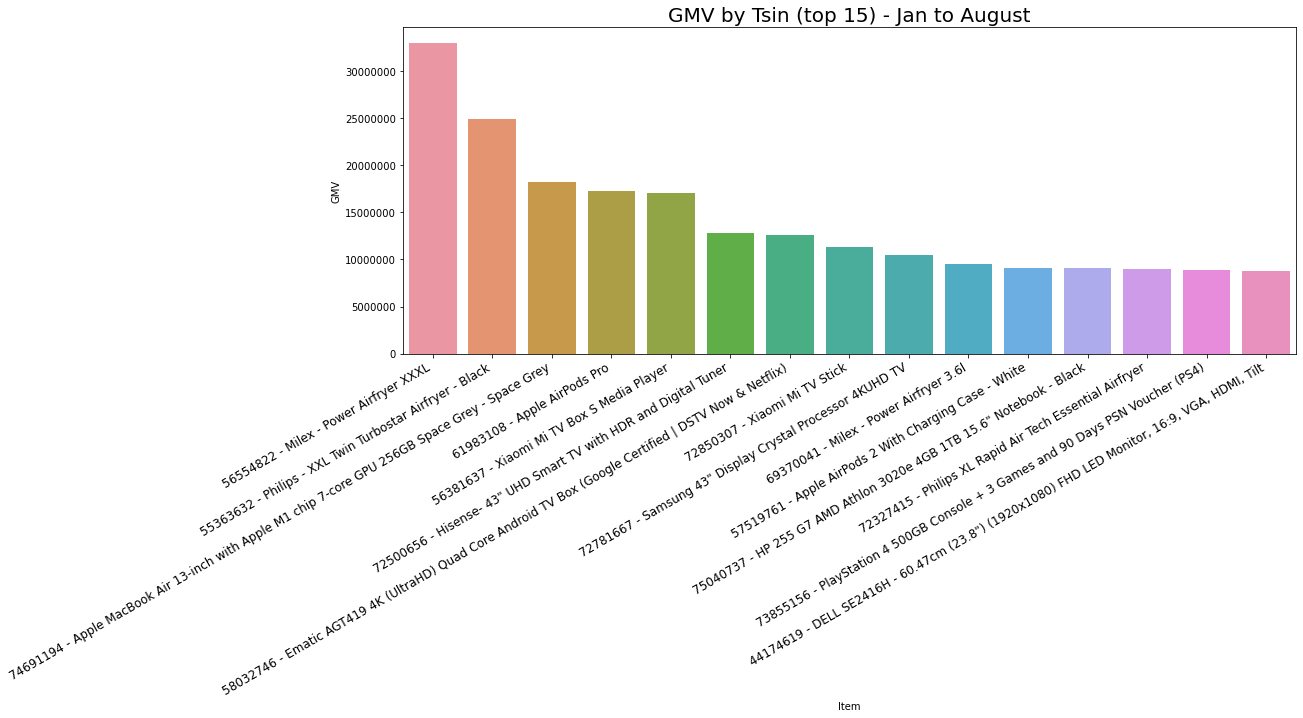

In [134]:

top_tsin_gmv = gmv_tsin.sort_values(by='Total',ascending=False)[:15]



plt.figure(figsize=(16,6))
sns.barplot(x='Item', y='Total', data=top_tsin_gmv)
plt.title('GMV by Tsin (top 15) - Jan to August', fontsize=20)
plt.ylabel('GMV')
plt.ticklabel_format(style='plain', axis='y'); # set scientific notation off
plt.xticks(rotation=30, ha='right',fontsize=12)
plt.show()

In [136]:
# count unique unit prices for each TSIN
df_items_gmv = df2.groupby('idTsin')\
             .agg({'Title': 'first',
                   'UnitPrice': ['nunique', 'count', 'mean', 'min', 'max'],
                    'Total':'sum',
                    'Qty':'sum'})\
             .reset_index()
# rename columns - merge multi-level columns from agg
df_items_gmv.columns = [level1+level2.title() if level2!='' else level1\
                    for level1, level2 in df_items_gmv.columns ]
df_items_gmv.sort_values(by=['UnitPriceNunique', 'UnitPriceCount'],
                     ascending=False, inplace=True)

df_items_gmv.head(10)

,idTsin,TitleFirst,UnitPriceNunique,UnitPriceCount,UnitPriceMean,UnitPriceMin,UnitPriceMax,TotalSum,QtySum
146215,62133964,"The Boy, The Mole, The Fox and The Horse",83,3568,266.310044,195.650000,599.130000,1431792.0,4696
11806,35387369,Dettol Hand Sanitiser - 200ml,74,1902,65.810475,38.260000,85.220000,309799.0,4209
4941,30566395,Montego - Classic Adult - Dog Food - Brown - 2...,73,14179,396.537766,344.350000,442.610000,8184316.0,17996
8858,31976571,SanDisk Cruzer Blade 32GB - USB Flash drive,66,10153,70.664147,60.000000,90.435000,1386840.0,17174
8986,32016511,Sandisk Cruzer Blade 16GB - Flash Drive,66,3498,58.656564,51.303333,59.130833,1021158.0,15174
98312,52300764,Mondi Rotatrim Box of A4 Paper,66,2695,294.534650,268.695000,369.570000,1382239.0,4062
209785,74760747,SanDisk 128GB 120MB/s Micro SD Ultra SDXC C10,63,4151,225.107324,190.430000,260.000000,1402742.0,5419
14835,36862268,Dettol Antiseptic Liquid - Disinfectant -750ml,63,1488,62.052470,45.215000,73.045000,173638.0,2440
42894,40876866,Typek Box of A4 White Copier Paper,61,8201,294.621114,268.695000,320.870000,3856102.0,11399
4952,30566437,Montego Karoo Adult Chicken & Lamb Dog Food - ...,60,4715,617.760169,522.610000,691.305000,3944293.0,5562


In [141]:
df_items_sub_gmv = df_items_gmv[(df_items_gmv['UnitPriceNunique']>=2)]
df_items_sub_gmv.head()

,idTsin,TitleFirst,UnitPriceNunique,UnitPriceCount,UnitPriceMean,UnitPriceMin,UnitPriceMax,TotalSum,QtySum
146215,62133964,"The Boy, The Mole, The Fox and The Horse",83,3568,266.310044,195.650000,599.130000,1431792.0,4696
11806,35387369,Dettol Hand Sanitiser - 200ml,74,1902,65.810475,38.260000,85.220000,309799.0,4209
4941,30566395,Montego - Classic Adult - Dog Food - Brown - 2...,73,14179,396.537766,344.350000,442.610000,8184316.0,17996
8858,31976571,SanDisk Cruzer Blade 32GB - USB Flash drive,66,10153,70.664147,60.000000,90.435000,1386840.0,17174
8986,32016511,Sandisk Cruzer Blade 16GB - Flash Drive,66,3498,58.656564,51.303333,59.130833,1021158.0,15174


In [142]:
df_items_sub_gmv.shape

(111289, 9)

In [143]:
df_items_sub_gmv['Item']= df_items_sub_gmv['idTsin'].astype(str) +' - '+ df_items_sub_gmv['TitleFirst']

In [30]:
df_items_sub_gmv.to_csv("df_items_sub_gmv.csv")

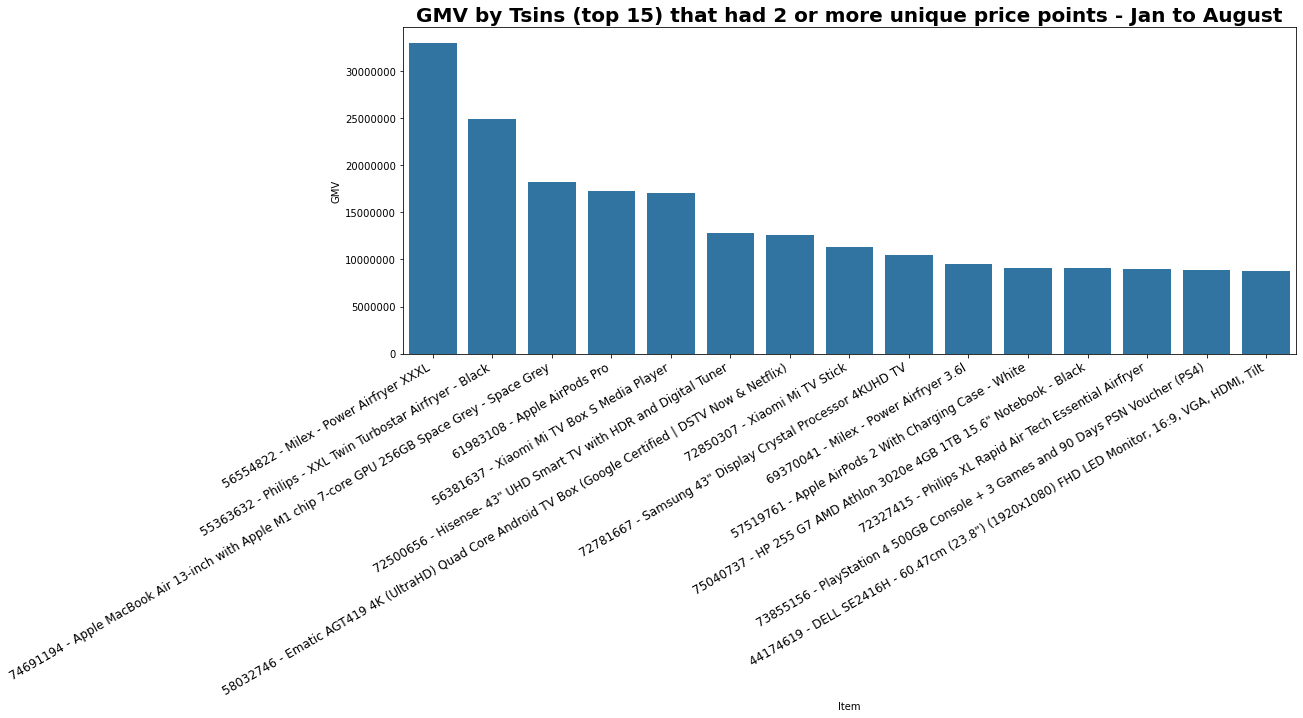

In [148]:

top_tsin_gmv2 = df_items_sub_gmv.sort_values(by='TotalSum',ascending=False)[:15]



plt.figure(figsize=(16,6))
sns.barplot(x='Item', y='TotalSum', data=top_tsin_gmv2, color='tab:blue')
plt.title('GMV by Tsins (top 15) that had 2 or more unique price points - Jan to August', weight='bold', fontsize=20)
plt.ylabel('GMV')
plt.ticklabel_format(style='plain', axis='y'); # set scientific notation off
plt.xticks(rotation=30, ha='right',fontsize=12)
plt.show()

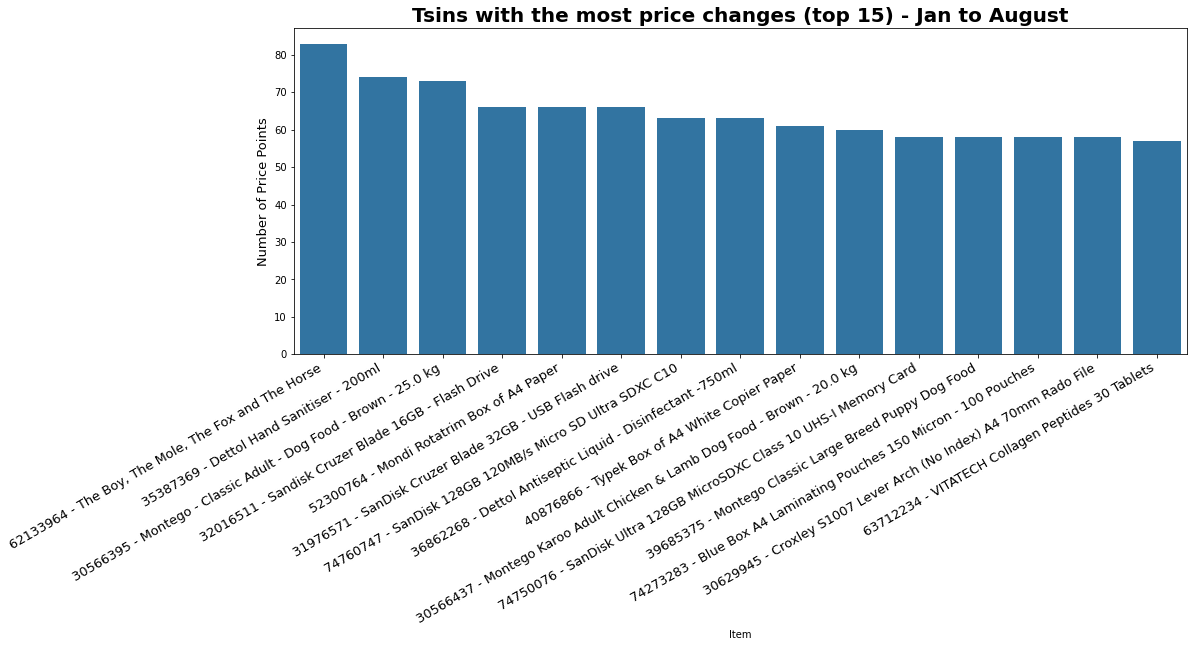

In [149]:
top_unit_price = df_items_sub_gmv.sort_values(by='UnitPriceNunique',ascending=False)[:15]



plt.figure(figsize=(16,6))
sns.barplot(x='Item', y='UnitPriceNunique', data=top_unit_price, color='tab:blue')
plt.title('Tsins with the most price changes (top 15) - Jan to August', weight='bold', fontsize=20)
plt.ylabel('Number of Price Points', fontsize=13)
plt.ticklabel_format(style='plain', axis='y'); # set scientific notation off
plt.xticks(rotation=30, ha='right', fontsize=13)
plt.show()

In [151]:
df2['Date'] = pd.to_datetime(df2['Date'])

In [154]:
# extract month, day, year etc from datetime
df2['Day_of_Week'] =  df2['Date'].dt.day_name()
df2['Month'] =  df2['Date'].dt.month_name()
df2['Year'] =  df2['Date'].dt.year
df2['Hour'] =  df2['Date'].dt.hour
df2['Day'] =  df2['Date'].dt.day
df2['Week_Number'] = df['Date'].dt.week

In [155]:
df2.head()

,idProduct,idOrder,idOrderItem,idTsin,SellerType,Division,ReportingDepartment,Level1,BrandName,UnitPrice,...,CostPrice,Title,Date,Item,Day_of_Week,Month,Year,Hour,Day,Week_Number
69,92883793,92634107,141297931,71966724,Retail,Lifestyle,Sport,Equipment,GetUp,451.30,...,284.35,GetUp Ab Cruncher,2021-08-25,71966724 - GetUp Ab Cruncher,Wednesday,August,2021,0,25,34
70,92883793,92574975,141144314,71966724,Retail,Lifestyle,Sport,Equipment,GetUp,451.30,...,284.35,GetUp Ab Cruncher,2021-08-24,71966724 - GetUp Ab Cruncher,Tuesday,August,2021,0,24,34
71,92883793,92567427,141125648,71966724,Retail,Lifestyle,Sport,Equipment,GetUp,451.30,...,284.35,GetUp Ab Cruncher,2021-08-24,71966724 - GetUp Ab Cruncher,Tuesday,August,2021,0,24,34
72,92883793,92610957,141235899,71966724,Retail,Lifestyle,Sport,Equipment,GetUp,451.30,...,284.35,GetUp Ab Cruncher,2021-08-24,71966724 - GetUp Ab Cruncher,Tuesday,August,2021,0,24,34
73,92883793,93001853,142192185,71966724,Retail,Lifestyle,Sport,Equipment,GetUp,564.35,...,303.53,GetUp Ab Cruncher,2021-08-31,71966724 - GetUp Ab Cruncher,Tuesday,August,2021,0,31,35


In [36]:
df2.to_csv("df2.csv")

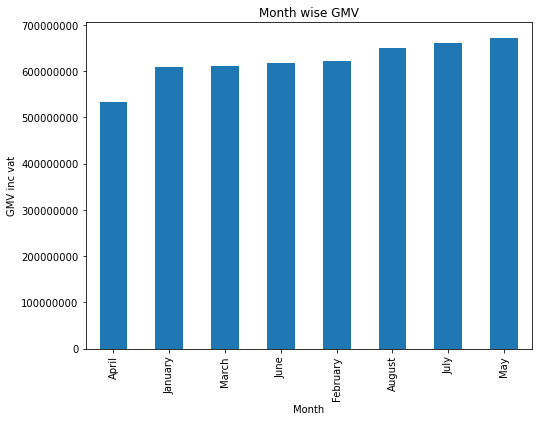

In [156]:
plt.ticklabel_format(style='plain', axis='y') # set scientific notation off

# Month wise GMV
df2.groupby('Month')['Total'].sum().sort_values(ascending=True).plot(kind='bar', figsize=(8,6))
plt.xlabel("Month")
plt.ylabel("GMV inc vat")
plt.title("Month wise GMV");

In [158]:
# count unique unit prices for each TSIN
df_items = df.groupby('idTsin')\
             .agg({'Title': 'first',
                   'UnitPrice': ['nunique', 'count', 'mean', 'min', 'max'],
                   'Total':'sum',
                    'Qty':'sum'})\
             .reset_index()
# rename columns - merge multi-level columns from agg
df_items.columns = [level1+level2.title() if level2!='' else level1\
                    for level1, level2 in df_items.columns ]
df_items.sort_values(by=['UnitPriceNunique', 'UnitPriceCount'],
                     ascending=False, inplace=True)
df_items.head(10)

,idTsin,TitleFirst,UnitPriceNunique,UnitPriceCount,UnitPriceMean,UnitPriceMin,UnitPriceMax,TotalSum,QtySum
146215,62133964,"The Boy, The Mole, The Fox and The Horse",83,3568,266.310044,195.650000,599.130000,1431792.0,4696
11806,35387369,Dettol Hand Sanitiser - 200ml,74,1902,65.810475,38.260000,85.220000,309799.0,4209
4941,30566395,Montego - Classic Adult - Dog Food - Brown - 2...,73,14179,396.537766,344.350000,442.610000,8184316.0,17996
8858,31976571,SanDisk Cruzer Blade 32GB - USB Flash drive,66,10153,70.664147,60.000000,90.435000,1386840.0,17174
8986,32016511,Sandisk Cruzer Blade 16GB - Flash Drive,66,3498,58.656564,51.303333,59.130833,1021158.0,15174
98312,52300764,Mondi Rotatrim Box of A4 Paper,66,2695,294.534650,268.695000,369.570000,1382239.0,4062
209785,74760747,SanDisk 128GB 120MB/s Micro SD Ultra SDXC C10,63,4151,225.107324,190.430000,260.000000,1402742.0,5419
14835,36862268,Dettol Antiseptic Liquid - Disinfectant -750ml,63,1488,62.052470,45.215000,73.045000,173638.0,2440
42894,40876866,Typek Box of A4 White Copier Paper,61,8201,294.621114,268.695000,320.870000,3856102.0,11399
4952,30566437,Montego Karoo Adult Chicken & Lamb Dog Food - ...,60,4715,617.760169,522.610000,691.305000,3944293.0,5562


In [185]:
# get TSins with more than 5 unique unit prices and sum the demand at each unique unit price
df_items_sub = df_items[(df_items['UnitPriceNunique']>=2)]

# subset items with at least 5 unit prices
df_sub = df[df['idTsin'].isin(df_items_sub['idTsin'].tolist())]\
                           .reset_index(drop=True)\
                           .drop(columns=['idOrder', 'idOrderItem', 'Date'])

# Get total quantity at each unit price for each item/product
df_agg = df_sub.groupby(['idTsin', 'UnitPrice','CostPrice','Title','Division','ReportingDepartment','Level1','BrandName'])['Qty']\
               .sum()\
               .reset_index()\
               .rename(columns={'Qty': 'TotalQuantity'})

In [173]:
df_items_sub.to_csv('df_items_final.csv')

In [186]:
df_agg.head(40)

,idTsin,UnitPrice,CostPrice,Title,Division,ReportingDepartment,Level1,BrandName,TotalQuantity
0,1008153,100.000000,76.77,The Nightmare Before Christmas (Special Editio...,Media,Music & DVD,Movies,No Brand,3
1,1008153,103.480000,77.62,The Nightmare Before Christmas (Special Editio...,Media,Music & DVD,Movies,No Brand,4
2,1008279,58.260000,42.09,Birdcage(DVD),Media,Music & DVD,Movies,No Brand,1
3,1008279,103.480000,79.74,Birdcage(DVD),Media,Music & DVD,Movies,No Brand,5
4,1008451,85.220000,61.42,Say Anything...(DVD),Media,Music & DVD,Movies,No Brand,2
5,1008451,100.000000,76.77,Say Anything...(DVD),Media,Music & DVD,Movies,No Brand,2
6,1008451,103.480000,77.62,Say Anything...(DVD),Media,Music & DVD,Movies,No Brand,5
7,1008493,39.130000,17.77,Safety of Objects(DVD),Media,Music & DVD,Movies,No Brand,1
8,1008493,40.000000,17.98,Safety of Objects(DVD),Media,Music & DVD,Movies,No Brand,1
9,1008515,17.390000,10.58,"Boo, Zino and the Snurks(DVD)",Media,Music & DVD,Movies,No Brand,10


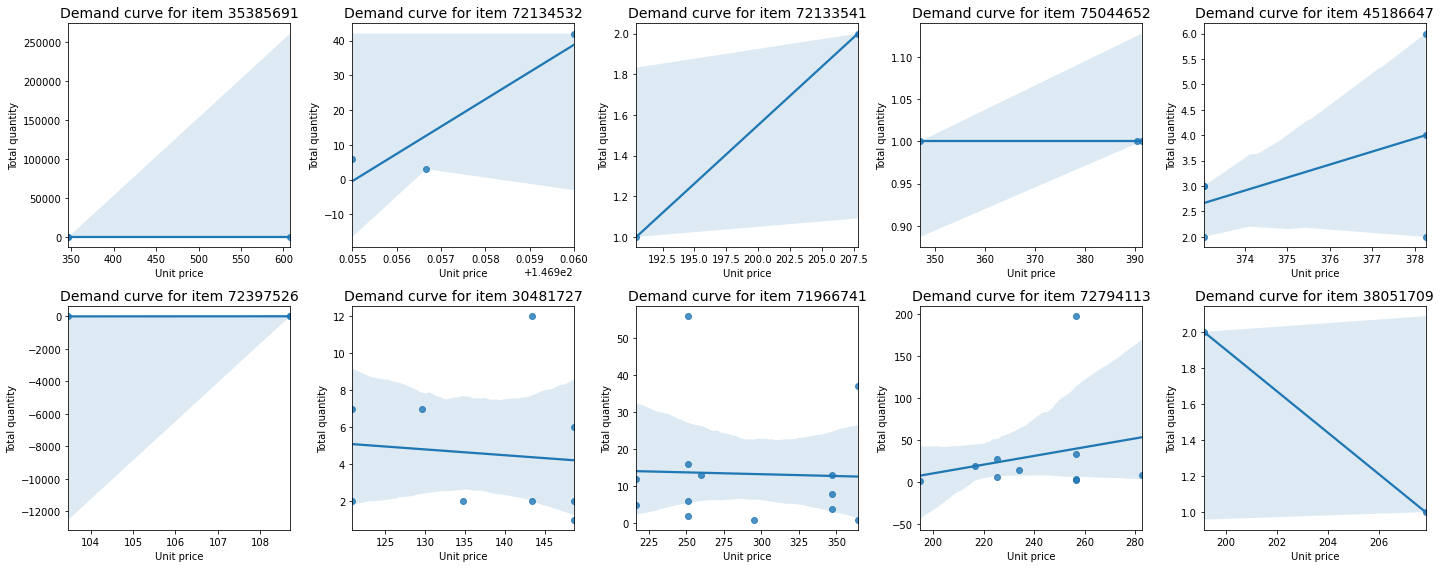

In [188]:
def plot_demand_curve(df, item_col, quantity_col, price_col, n=10):
    '''randomly select n items from a dataframe to plot each
       item's / Tsin's demand curve
       '''
    fig, ax = plt.subplots(2, 5, figsize=(20, 8))
    ax = ax.ravel()
    
    #randomly choose n items to be plotted
    items_to_plot = random.sample(df[item_col].unique().tolist(),n)     
    
     # plot demand vs unit price for these n items
    for i, item in enumerate(items_to_plot):
        sns.regplot(x=price_col, y=quantity_col, data=df[df[item_col]==item], ax=ax[i])
        ax[i].set_title('Demand curve for item '+str(item), fontsize=14)
        ax[i].set_xlabel('Unit price')
        ax[i].set_ylabel('Total quantity')
    plt.tight_layout()
    plt.show()

plot_demand_curve(df_agg, 'idTsin', 'TotalQuantity', 'UnitPrice')

In [189]:
df_agg['Item']= df_agg['idTsin'].astype(str) +' - '+ df_agg['Title']

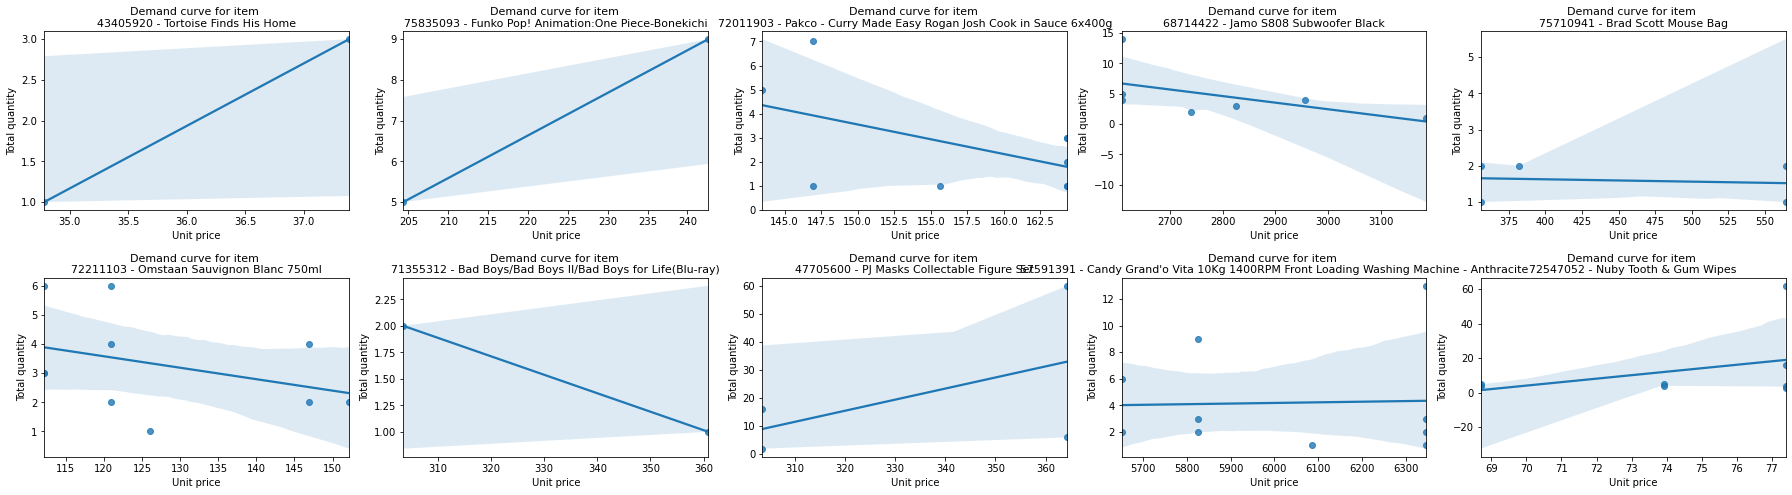

In [190]:
# demand curves with idTsin  + Titles
def plot_demand_curve(df, item_col, quantity_col, price_col, n=10):
    '''randomly select n items from a dataframe to plot each
       item's / Tsin's demand curve
       '''
    fig, ax = plt.subplots(2, 5, figsize=(25, 7))
    ax = ax.ravel()
    
    #randomly choose n items to be plotted
    items_to_plot = random.sample(df[item_col].unique().tolist(),n)     
    
     # plot demand vs unit price for these n items
    for i, item in enumerate(items_to_plot):
        sns.regplot(x=price_col, y=quantity_col, data=df[df[item_col]==item], ax=ax[i])
        ax[i].set_title('Demand curve for item \n' +str(item), fontsize=11, loc='center', wrap=True)
        ax[i].set_xlabel('Unit price')
        ax[i].set_ylabel('Total quantity')
    plt.tight_layout()
    plt.show()

plot_demand_curve(df_agg, 'Item', 'TotalQuantity', 'UnitPrice')

In [202]:
def get_elasticity(df, quantity_col, price_col):
    '''fits linear regression for one item, quantity_col is
       used as outcome variable and price_col as independent variable
       returns intercept, slope, p-value of regression, and also
       price elasticity
       '''
    
    #regress quantity over price to estimate price elasticity
    reg_fit = ols(formula=quantity_col+' ~ '+price_col, data=df).fit()
    
    # extract intercept slope and p-value from model parameters
    intercept = reg_fit.params['Intercept']
    slope = reg_fit.params[price_col]
    p_value = reg_fit.pvalues.loc[price_col] 
    rsquared = reg_fit.rsquared
    std_err = reg_fit.bse[price_col]
    #conf_int = reg_fit.conf_int().rename(columns={0: 'lower', 1: 'upper'})
    
    # calculate elasticity - slope*(mean price/mean quantity)
    elasticity = slope * (df[price_col].mean() / df[quantity_col].mean())
    
    
    return intercept, slope, p_value, elasticity, rsquared, std_err

In [203]:
def get_multiple_elasticity(df, item_id_col, quantity_col, price_col):
    '''runs linear regression for multiple items in a df
       returns a separate df with item id, elasticity,
       p-value, and whether price is a significant predictor of 
       quantity
    '''
    elasticity_results = []
     
    for item_id in df[item_id_col].unique():
        elasticity = {}
        # subset rows with item_id
        df_single_item = df[df[item_id_col]==item_id]
        # store intercept slope and p-value in dict
        elasticity['idTsin'] = item_id
        elasticity['Intercept'], elasticity['Slope'], elasticity['PValue'], elasticity['Elasticity'], elasticity['Rsquared'], elasticity['Std_Err']\
               = get_elasticity(df_single_item, quantity_col, price_col)
        elasticity_results.append(elasticity)
        
        df_elasticity = pd.DataFrame(elasticity_results).set_index('idTsin')
        # use p <.05 as cutoff for significance
        df_elasticity['Significant'] = df_elasticity['PValue'].apply(lambda x:
                                                                     'Yes' if x < 0.05 else 'No')
        
    return df_elasticity

In [197]:
df_agg2 = df_agg.head(100)
df_agg2.shape

(100, 10)

In [205]:
# get elasticity for all items in df_agg

start_time = time.time()

df_elasticity = get_multiple_elasticity(df_agg, 'idTsin','TotalQuantity', 'UnitPrice')
df_elasticity = df_elasticity.merge(df[['idTsin', 'Title']].drop_duplicates(), on='idTsin', how='left')

print("--- %s seconds ---" % (time.time() - start_time))
df_elasticity.head()

KeyboardInterrupt: 

In [200]:
df_elasticity.shape

(14, 9)

In [121]:
df_elasticity['idTsin'] = df_elasticity['idTsin'].astype(str)

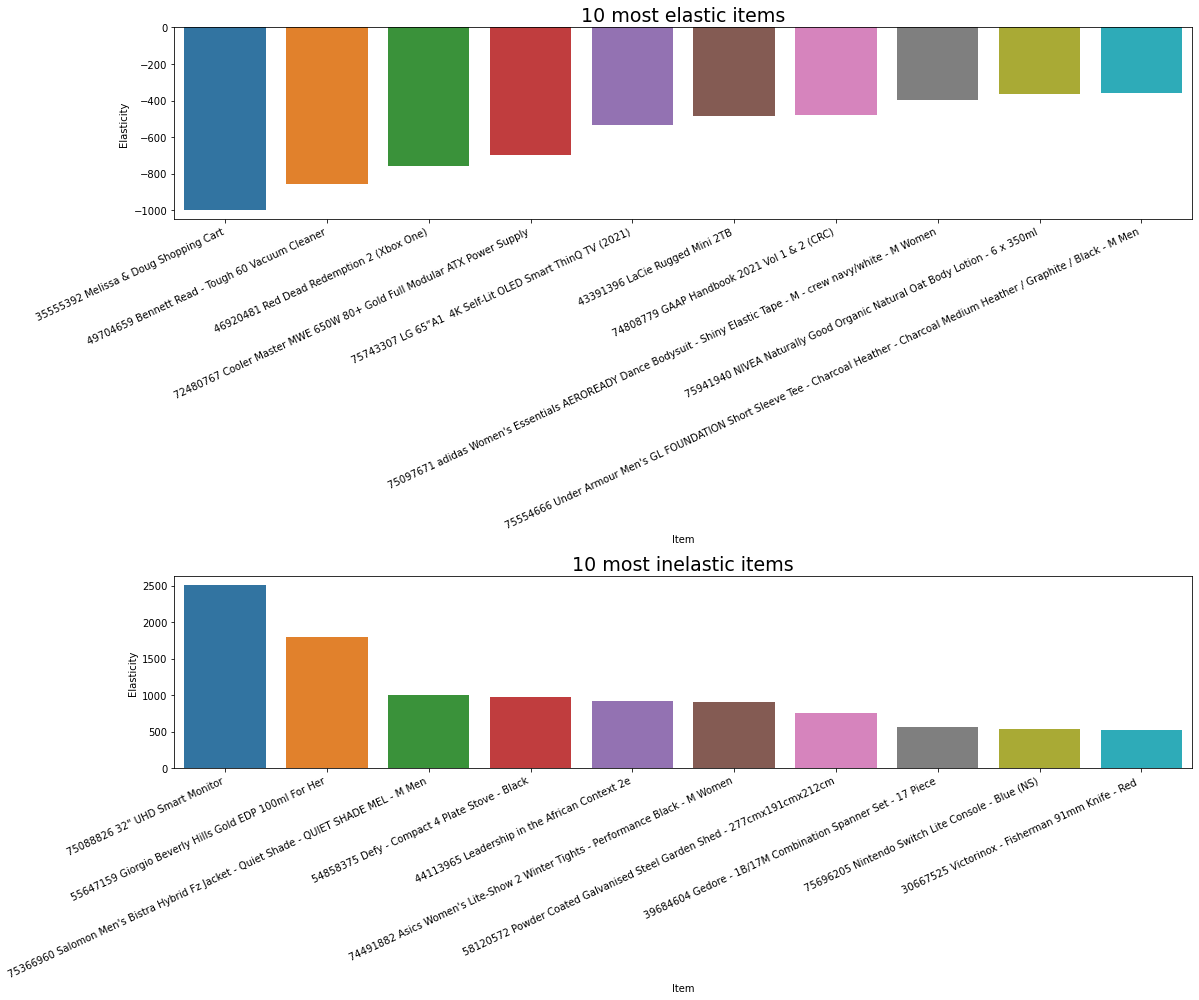

In [197]:
# subset items with significant p-value
#df_elasticity = df_elasticity[df_elasticity['Significant']=='Yes']
df_elasticity['Item'] = df_elasticity['idTsin'].astype(str) +' - '+ df_elasticity['Title']

# make df for most and least elastic items
df_most_elastic = df_elasticity.sort_values(by='Elasticity')[:10]
df_least_elastic = df_elasticity.sort_values(by='Elasticity',
                                             ascending=False)[:10]

fig, axes = plt.subplots(2, 1, figsize=(17, 14))
sns.barplot(x='Item', y='Elasticity', data=df_most_elastic, ax=axes[0])
axes[0].set_title('10 most elastic items', fontsize=19)
sns.barplot(x='Item', y='Elasticity', data=df_least_elastic, ax=axes[1])
axes[1].set_title('10 most inelastic items', fontsize=19)
for ax in axes:
    for label in ax.get_xticklabels():
        label.set_rotation(25)
        label.set_horizontalalignment("right")
plt.tight_layout()
plt.show()

In [157]:
df_elasticity['PED Status'] = np.where(df_elasticity['Elasticity'] <= -5, 'Highly Elastic'
        ,np.where((df_elasticity['Elasticity']>-5) & (df_elasticity['Elasticity']<=-2),'Elastic'
        ,np.where((df_elasticity['Elasticity']>-2) & (df_elasticity['Elasticity']<0),'Unit-Elastic','Inelastic')))

In [158]:
# remove duplicate idTsins
df_elasticity.drop_duplicates(subset='idTsin',keep='first',inplace=True)

In [159]:
df_elasticity.head()

,idTsin,Intercept,Slope,PValue,Elasticity,Rsquared,Std_Err,Significant,Title,Item,PED Status
0,1008153,-25.750000,0.250000,NaN,8.357143,1.000000,inf,No,The Nightmare Before Christmas (Special Editio...,1008153 The Nightmare Before Christmas (Specia...,Inelastic
1,1008451,-0.093101,0.020781,0.83464,1.041378,0.027344,0.087641,No,Say Anything (DVD),1008451 Say Anything (DVD),Inelastic
2,1008493,1.000000,0.000000,NaN,0.000000,NaN,NaN,No,Safety Of Objects - (Import DVD),1008493 Safety Of Objects - (Import DVD),Inelastic
3,1008515,13.050847,-0.152542,NaN,-1.372881,1.000000,inf,No,"Boo, Zino & The Snurks (DVD)","1008515 Boo, Zino & The Snurks (DVD)",Unit-Elastic
4,1021019,48.600000,-0.400000,NaN,-15.200000,1.000000,inf,No,Boys From Brazil - (Import DVD),1021019 Boys From Brazil - (Import DVD),Highly Elastic


In [160]:
df_elasticity.shape

(63725, 11)

In [161]:
# export df to csv file
df_elasticity.to_csv("df_elasticityfinal.csv")